# COVID-19 Case Study

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [41]:
#Sample dataset
data={
    'Date':pd.to_datetime(['2024-01-01','2024-01-02','2024-01-03','2024-01-04','2024-01-05','2024-01-06','2024-01-07','2024-01-08','2024-01-09','2024-01-10']),
    'Region':['Region A','Region A','Region A','Region A','Region A','Region B','Region B','Region B','Region B','Region B'],
    'Confirmed Cases':[100,150,200,250,300,50,75,100,125,150],
    'Recovered Cases':[90,140,190,240,290,45,70,95,120,145],
    'Deaths':[5,7,9,11,14,2,3,4,6,8]
}
df=pd.DataFrame(data)
print(df)

        Date    Region  Confirmed Cases  Recovered Cases  Deaths
0 2024-01-01  Region A              100               90       5
1 2024-01-02  Region A              150              140       7
2 2024-01-03  Region A              200              190       9
3 2024-01-04  Region A              250              240      11
4 2024-01-05  Region A              300              290      14
5 2024-01-06  Region B               50               45       2
6 2024-01-07  Region B               75               70       3
7 2024-01-08  Region B              100               95       4
8 2024-01-09  Region B              125              120       6
9 2024-01-10  Region B              150              145       8


In [42]:
# Step 1: Rolling Average (7 days moving average)
df['Confirmed Cases MA'] = df.groupby('Region')['Confirmed Cases'].rolling(window=7).mean().reset_index(level=0, drop=True)
df['Recovered Cases MA'] = df.groupby('Region')['Recovered Cases'].rolling(window=7).mean().reset_index(level=0, drop=True)
df['Deaths MA'] = df.groupby('Region')['Deaths'].rolling(window=7).mean().reset_index(level=0, drop=True)

In [44]:
# Step 2: Detect Anomalies (outliers)
# Using IQR (Inter-Quartile Range) to detect anomalies in confirmed cases
Q1 = df['Confirmed Cases'].quantile(0.25)
Q3 = df['Confirmed Cases'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Anomaly'] = (df['Confirmed Cases'] < lower_bound) | (df['Confirmed Cases'] > upper_bound)

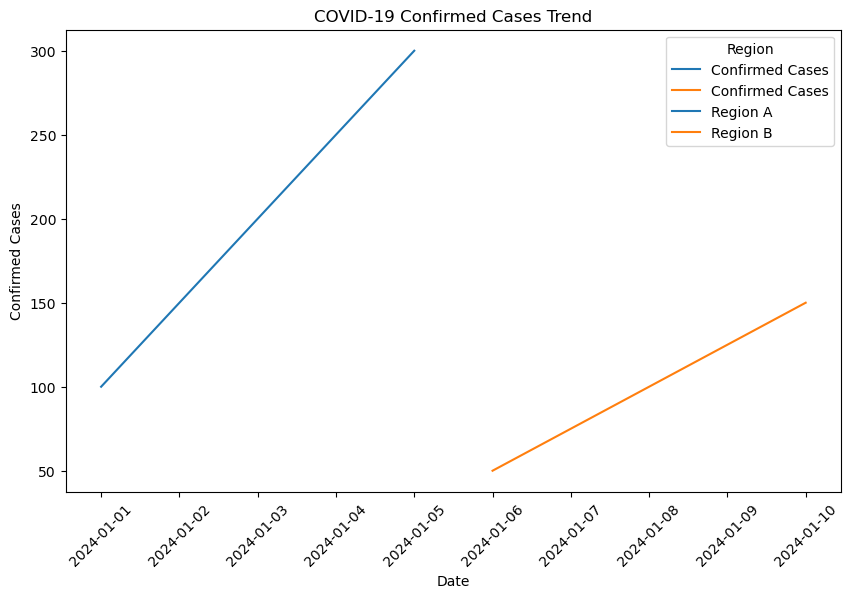

In [45]:
# Step 3: Data Visualization
# Trend visualization for confirmed cases
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Confirmed Cases', hue='Region', label="Confirmed Cases")
plt.title('COVID-19 Confirmed Cases Trend')
plt.xticks(rotation=45)
plt.show()

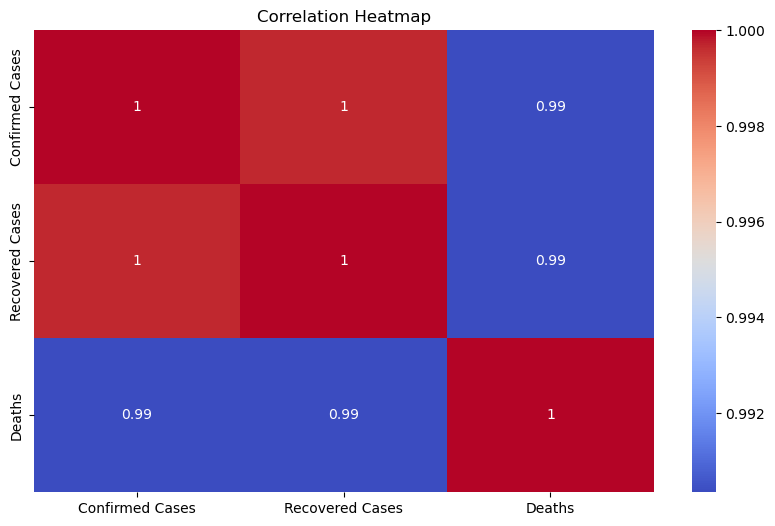

In [46]:
# Heatmap to visualize anomalies
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Confirmed Cases', 'Recovered Cases', 'Deaths']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [47]:
# Step 4: Predictive Modeling (Linear Regression Example)
# Prepare data for prediction
df['Day'] = (df['Date'] - df['Date'].min()).dt.days  # Convert Date to numerical days
X = df[['Day']]  # Features (Days)
y = df['Confirmed Cases']  # Target variable (Confirmed Cases)

In [48]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Make predictions
y_pred = model.predict(X_test)

In [52]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 15.625


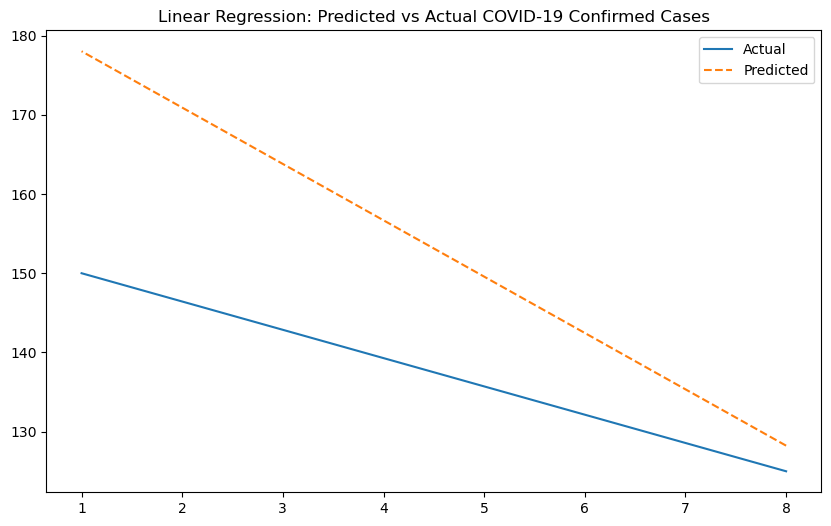

In [53]:
# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, label='Actual')
plt.plot(X_test, y_pred, label='Predicted', linestyle='--')
plt.title('Linear Regression: Predicted vs Actual COVID-19 Confirmed Cases')
plt.legend()
plt.show()